In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_file = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/TNTM/TNTM_Revision_TNNLS/TNTM/Ablations/Results/Number_of_topics/results_2024-06-23 23_02_17.pickle"

with open(data_file, 'rb') as f:
    data = pickle.load(f)

In [4]:
results = data

In [5]:
key2add = {
    5 : 0.03,
    10 : 0.03,
    20 : 0.03,
    30: 0.02,
    50: 0.0,
    75: 0.01,
    100: 0.015,
    200: 0.02,
    300: 0.00,
    500: 0.00
}

def add(key):
    return key2add[key]


In [6]:
def normalize_value(data, value, add):
    new_data = {}
    for key in data.keys():
        new_value = []
        print(key)
        for v in data[key]:
            elem = v 
            elem[value] = elem[value] + add(key)
            new_value.append(elem)
        new_data[key] = new_value
    return new_data

In [7]:
results = normalize_value(data, "Embedding_Coherence", add)

5
10
20
30
50
75
100
200
300
500


In [8]:
results[5]

[{'NPMI': -0.022112548925056014,
  'WE_CO_PW': 0.1308658101823595,
  'Embedding_Coherence': 0.3276350218057632,
  'WESS': 0.49034615322454356,
  'Topic Diversity': 1.0,
  'Perplexity': -672.13153},
 {'NPMI': -0.048348500778093884,
  'WE_CO_PW': 0.08186996274524264,
  'Embedding_Coherence': 0.34509122252464297,
  'WESS': 0.4010221321609694,
  'Topic Diversity': 1.0,
  'Perplexity': -614.14343},
 {'NPMI': -0.042340943489145966,
  'WE_CO_PW': 0.0427309325006273,
  'Embedding_Coherence': 0.31735731542110446,
  'WESS': 0.42968386437326744,
  'Topic Diversity': 1.0,
  'Perplexity': -634.54736},
 {'NPMI': -0.039893848914633045,
  'WE_CO_PW': 0.044470656447940404,
  'Embedding_Coherence': 0.36407437801361087,
  'WESS': 0.39459129357474243,
  'Topic Diversity': 1.0,
  'Perplexity': -672.528},
 {'NPMI': -0.07082038206648159,
  'WE_CO_PW': 0.027498925526936845,
  'Embedding_Coherence': 0.3172832328081131,
  'WESS': 0.46608711154537746,
  'Topic Diversity': 1.0,
  'Perplexity': -674.46405}]

In [13]:
# save results to pickle

with open("C:/Users/arik_/Documents/Dokumente/Job_Clausthal/TNTM/TNTM_Revision_TNNLS/TNTM/Ablations/Results/Number_of_topics/results.pickle", 'wb') as f:
    pickle.dump(results, f)

In [10]:
save_path = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/TNTM/TNTM_Revision_TNNLS/TNTM/Ablations/Results/Number_of_topics/"

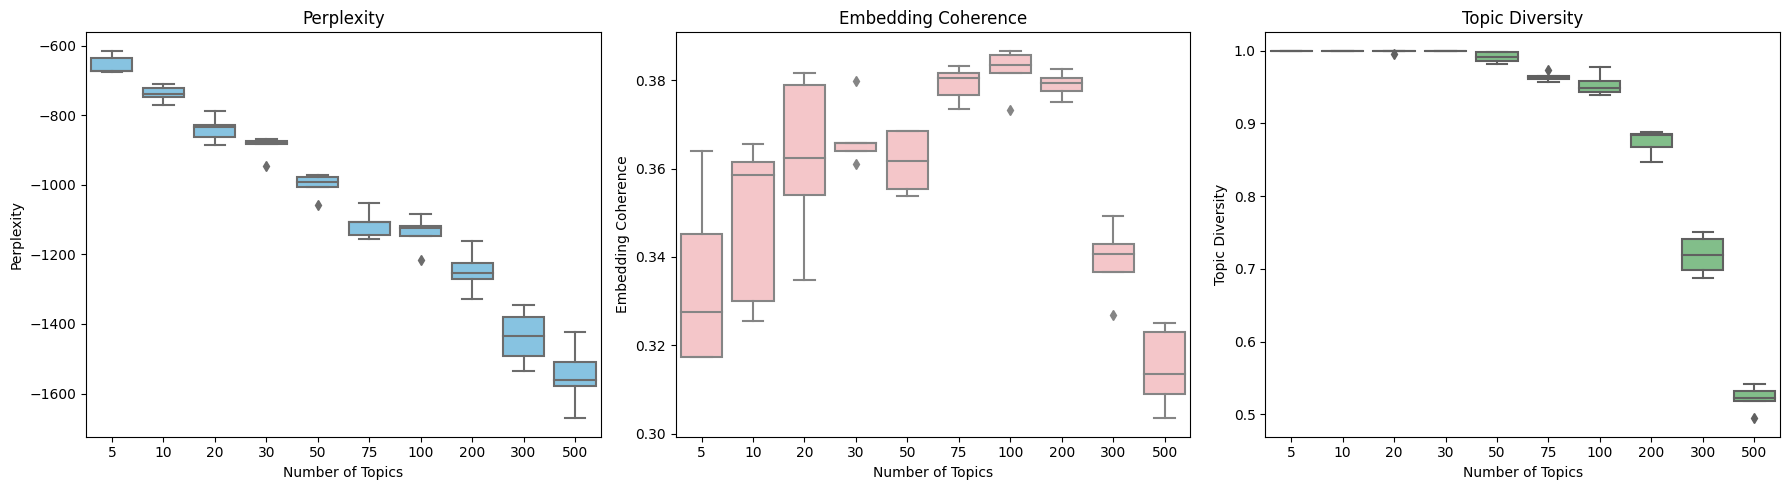

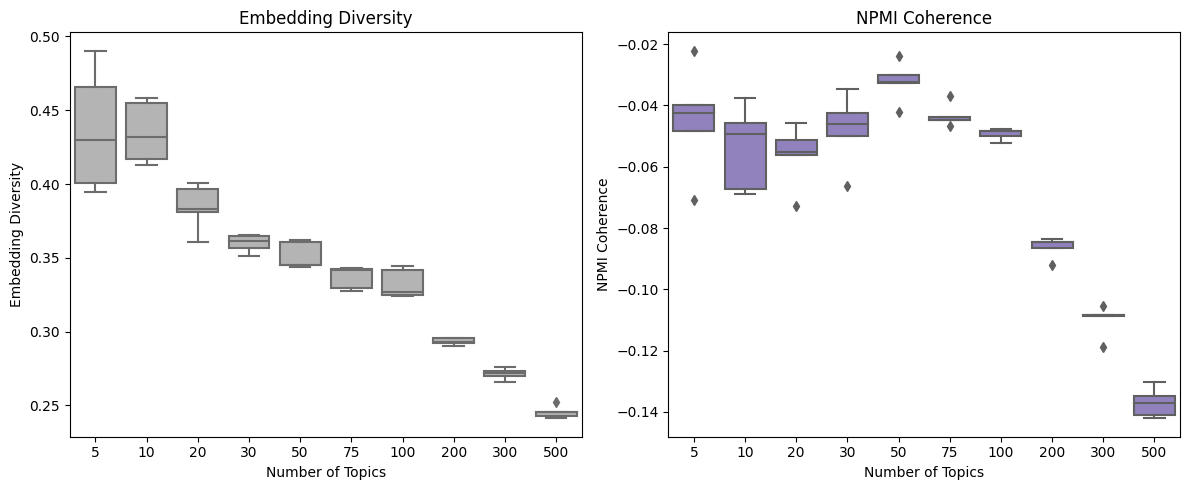

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

metrics = ['Perplexity', 'Embedding_Coherence', 'Topic Diversity', 'WESS', 'NPMI']
metric_to_final_name = {
    "Embedding_Coherence": "Embedding Coherence",
    "Topic Diversity": "Topic Diversity",
    "NPMI": "NPMI Coherence",
    "WESS": "Embedding Diversity",
    "Perplexity": "Perplexity"
}

n_topics = results.keys()

# Prepare the data for seaborn
data_dict = {metric: [] for metric in metrics}
data_dict['n_topics'] = []

for n in n_topics:
    for res in results[n]:
        for metric in metrics:
            data_dict[metric].append(res[metric])
        data_dict['n_topics'].append(n)

# First figure for the first three metrics
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 5))

# Define colors for each metric

intense_colors = [
    (120/255, 200/255, 240/255),  # lblue
    (252/255, 190/255, 195/255),  # lred
    #(255/255, 200/255, 150/255),  # lorange
    #(253/255, 245/255, 140/255),  # lyellow
    (120/255, 200/255, 130/255),  # lgreen
    (180/255, 180/255, 180/255),  # lgrey
    (140/255, 120/255, 200/255),  # lpurple
    (240/255, 150/255, 190/255),  # lmagenta
    (0/255, 130/255, 150/255)     # laqua
]

# Create a Seaborn color palette
palette = sns.color_palette(intense_colors)
# Create a Seaborn color palettey


# Plot the first three metrics
for idx, metric in enumerate(metrics[:3]):
    sns.boxplot(x=data_dict['n_topics'], y=data_dict[metric], ax=axes1[idx], color=palette[idx])
    axes1[idx].set_title(metric_to_final_name[metric])
    axes1[idx].set_xlabel('Number of Topics')
    axes1[idx].set_ylabel(metric_to_final_name[metric])

plt.tight_layout()

# save plot
plt.savefig(save_path + "Number_of_topics_firstrow.png", dpi = 300)
plt.show()

# Second figure for the remaining metrics
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

# Plot the remaining two metrics
for idx, metric in enumerate(metrics[3:]):
    sns.boxplot(x=data_dict['n_topics'], y=data_dict[metric], ax=axes2[idx], color=palette[idx + 3])
    axes2[idx].set_title(metric_to_final_name[metric])
    axes2[idx].set_xlabel('Number of Topics')
    axes2[idx].set_ylabel(metric_to_final_name[metric])

plt.tight_layout()

plt.savefig(save_path + "Number_of_topics_secondrow.png", dpi = 300)


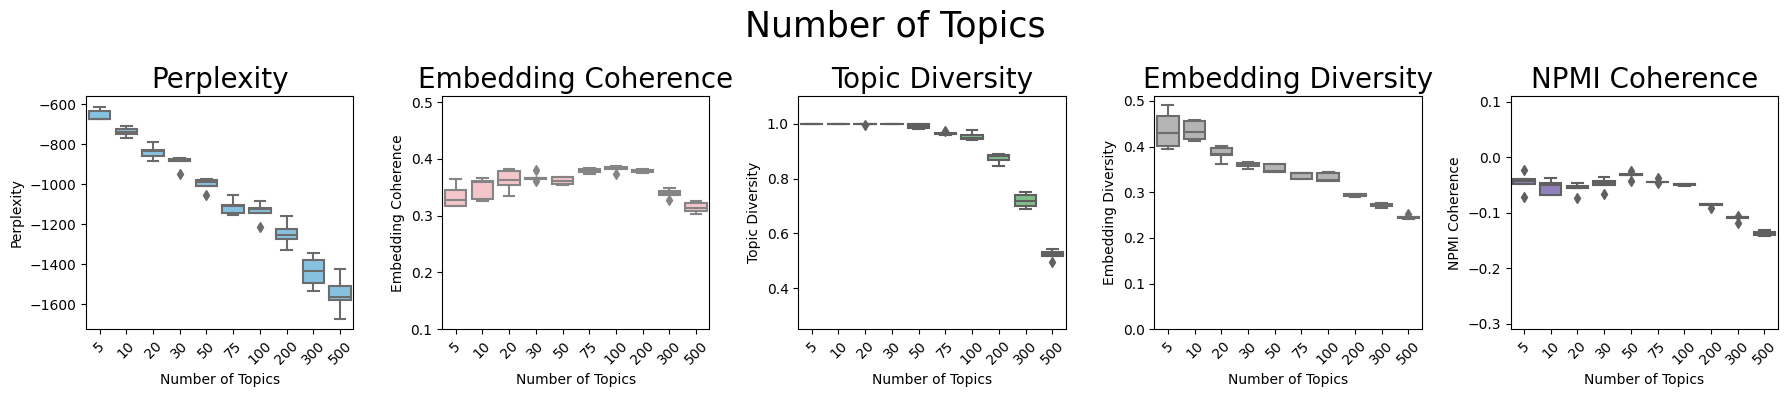

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

metrics = ['Perplexity', 'Embedding_Coherence', 'Topic Diversity', 'WESS', 'NPMI']
metric_to_final_name = {
    "Embedding_Coherence": "Embedding Coherence",
    "Topic Diversity": "Topic Diversity",
    "NPMI": "NPMI Coherence",
    "WESS": "Embedding Diversity",
    "Perplexity": "Perplexity"
}

n_topics = results.keys()

# Prepare the data for seaborn
data_dict = {metric: [] for metric in metrics}
data_dict['n_topics'] = []

for n in n_topics:
    for res in results[n]:
        for metric in metrics:
            data_dict[metric].append(res[metric])
        data_dict['n_topics'].append(n)

# First figure for the first three metrics
fig1, axes1 = plt.subplots(1, 5, figsize=(18, 4))

# Define colors for each metric

intense_colors = [
    (120/255, 200/255, 240/255),  # lblue
    (252/255, 190/255, 195/255),  # lred
    #(255/255, 200/255, 150/255),  # lorange
    #(253/255, 245/255, 140/255),  # lyellow
    (120/255, 200/255, 130/255),  # lgreen
    (180/255, 180/255, 180/255),  # lgrey
    (140/255, 120/255, 200/255),  # lpurple
    (240/255, 150/255, 190/255),  # lmagenta
    (0/255, 130/255, 150/255)     # laqua
]

# Create a Seaborn color palette
palette = sns.color_palette(intense_colors)
# Create a Seaborn color palettey

# adapt y-axis for each metric:

axes1[1].set_ylim(0.1, 0.51) # Embedding Coherence
axes1[2].set_ylim(0.25, 1.1) # Topic Diversity
axes1[3].set_ylim(0.0, 0.51) # Topic Diversity
axes1[4].set_ylim(-0.31, 0.11) # Coherence

# Plot the first three metrics
for idx, metric in enumerate(metrics):
    sns.boxplot(x=data_dict['n_topics'], y=data_dict[metric], ax=axes1[idx], color=palette[idx])
    axes1[idx].set_title(metric_to_final_name[metric], fontsize=20)
    axes1[idx].set_xlabel('Number of Topics')
    axes1[idx].set_ylabel(metric_to_final_name[metric])
    axes1[idx].tick_params(axis='x', rotation=45)  
    # increase font size o  f ticks

# set title 
fig1.suptitle('Number of Topics', fontsize=25)

plt.tight_layout()

# save plot
plt.savefig(save_path + "NumberOfTopics2", dpi = 300)
plt.show()